# **<span style = 'color:blue'>Neural Prophet</span>**

## **<span style='color:green'> Table of Contents:</span>**<a id="Table"></a>

* [Import the libraries](#Import)
* [Load the data](#Load)
* [Neural Prophet](#Prophet)
    - [1-step ahead forecast with Auto-Regression](#Auto-regression)
    - [1-step ahead forecast with AR-Net: Using a Neural Network](#AR-Net)

In [1]:
pip install neuralprophet[live]  --quiet

Note: you may need to restart the kernel to use updated packages.


## **<span style = 'color:green'>1. Import the required libraries</span>**<a id ="Import"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table) 

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")
import matplotlib.pyplot as plt

## **<span style = 'color:green'>2. Load the dataset</span>**<a name ='Load'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

In [3]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df = pd.read_csv(data_location + "wp_log_peyton_manning.csv")
df.tail(3)

,ds,y
2961,2016-01-18,10.3338
2962,2016-01-19,9.1259
2963,2016-01-20,8.8914


## **<span style = 'color:green'>3. Neural Prophet for univariate analysis**<a name ='Prophet'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table) 
### **<span  style ='color: orange'> Generic model</span>**<a id ='Basic'></a>

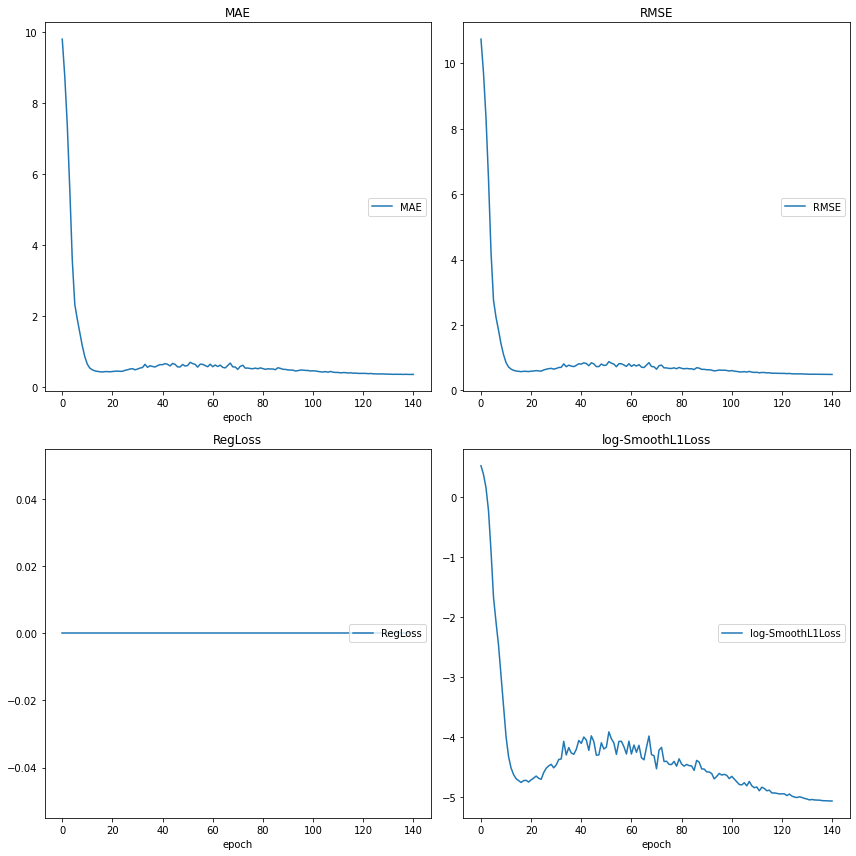

MAE
	MAE              	 (min:    0.351, max:    9.810, cur:    0.352)
RMSE
	RMSE             	 (min:    0.488, max:   10.739, cur:    0.488)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-SmoothL1Loss
	log-SmoothL1Loss 	 (min:   -5.072, max:    0.530, cur:   -5.072)


,SmoothL1Loss,MAE,RMSE,RegLoss
0,1.698189,9.810209,10.739044,0.0
1,1.470458,8.765173,9.710763,0.0
2,1.177689,7.393809,8.337300,0.0


In [4]:
m = NeuralProphet()
metrics = m.fit(df, freq="D",  progress="plot-all")
metrics.head(3)

In [5]:
future = m.make_future_dataframe(df, periods=365, n_historic_predictions=True)
future.tail(3)

,ds,y
3326,2017-01-17,NaN
3327,2017-01-18,NaN
3328,2017-01-19,NaN


In [6]:
forecast = m.predict(future)
print(list(forecast.columns))

['ds', 'y', 'yhat1', 'residual1', 'trend', 'season_yearly', 'season_weekly']


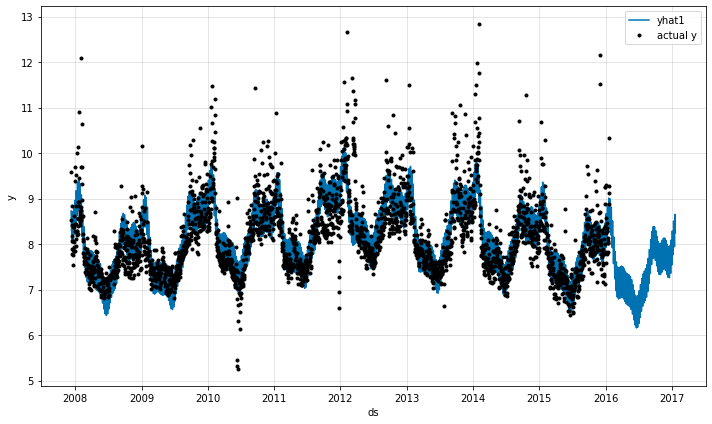

In [7]:
# plots the model predictions
fig1 = m.plot(forecast)

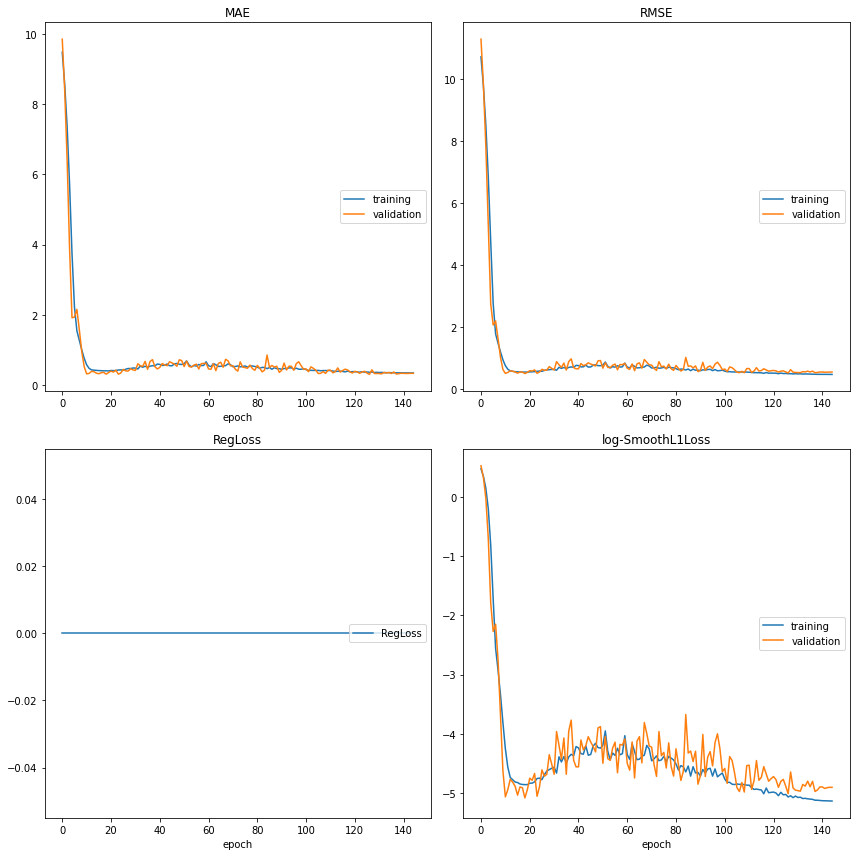

MAE
	training         	 (min:    0.351, max:    9.474, cur:    0.351)
	validation       	 (min:    0.308, max:    9.846, cur:    0.340)
RMSE
	training         	 (min:    0.480, max:   10.707, cur:    0.480)
	validation       	 (min:    0.509, max:   11.277, cur:    0.556)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-SmoothL1Loss
	training         	 (min:   -5.131, max:    0.473, cur:   -5.131)
	validation       	 (min:   -5.078, max:    0.523, cur:   -4.900)


,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
144,0.005908,0.350828,0.480252,0.0,0.007445,0.340278,0.556476


In [8]:
m = NeuralProphet()
df_train, df_val = m.split_df(df, freq='D', valid_p = 1.0/12)
metrics = m.fit(df_train, validation_df=df_val, progress="plot-all")
metrics.tail(1)

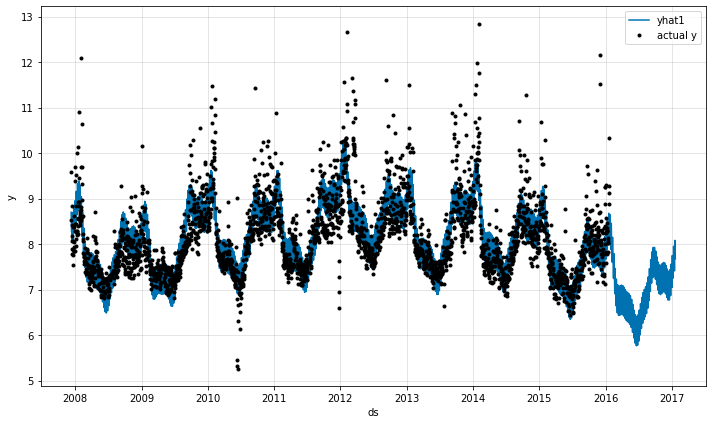

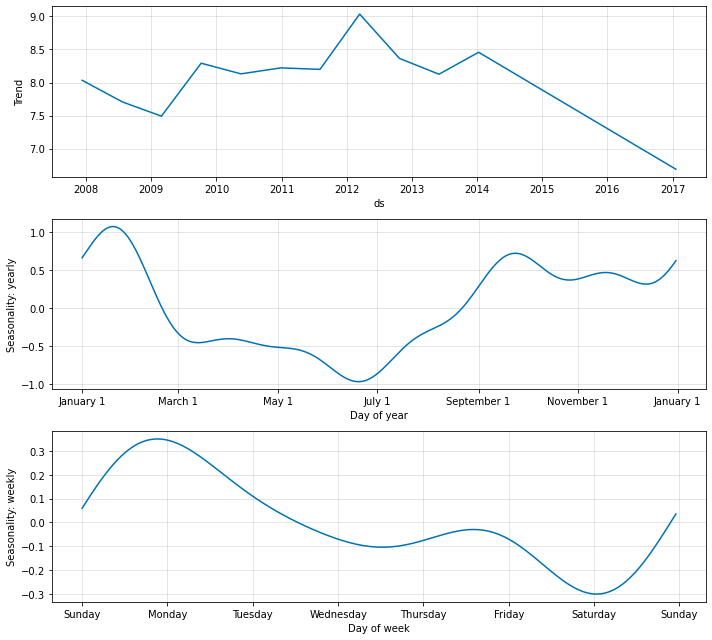

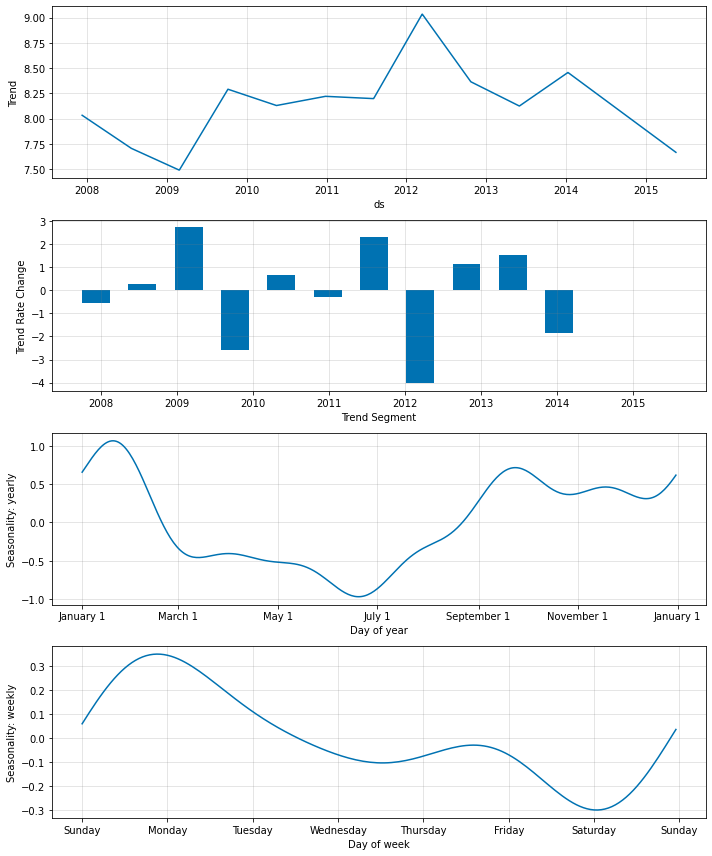

In [9]:
future = m.make_future_dataframe(df, periods=365, n_historic_predictions=True)
forecast = m.predict(future)
# plots the model predictions
fig1 = m.plot(forecast)
plt2 = m.plot_components(forecast)
fig_param = m.plot_parameters()


### **<span  style ='color: brown'> 1-step ahead forecast with Auto-Regression</span>**<a id ='Auto-regression'></a>

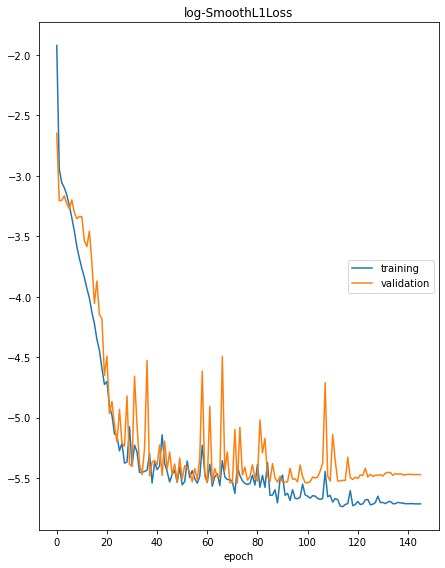

log-SmoothL1Loss
	training         	 (min:   -5.736, max:   -1.923, cur:   -5.713)
	validation       	 (min:   -5.541, max:   -2.648, cur:   -5.470)


,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
145,0.003303,0.246373,0.360742,0.000795,0.004209,0.26046,0.417973


In [10]:
m = NeuralProphet(
    growth='off',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*30,
    ar_reg=1,
    learning_rate = 0.01,
)
df_train, df_test = m.split_df(df, freq='D', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='D', validation_df=df_test, progress='plot')
metrics.tail(1)

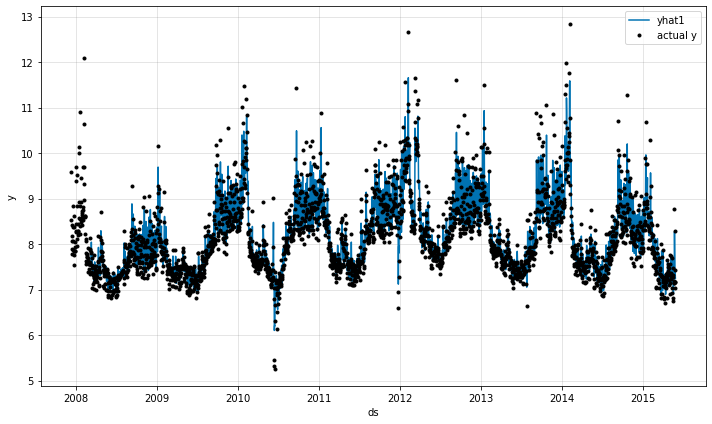

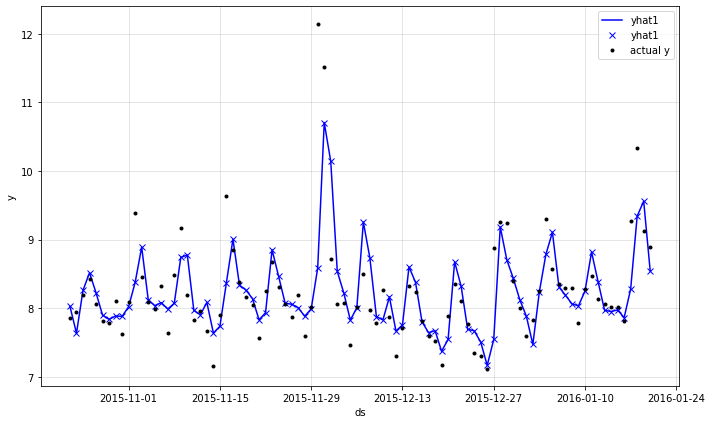

In [11]:
forecast = m.predict(df_train)
fig = m.plot(forecast)
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-3*30:])

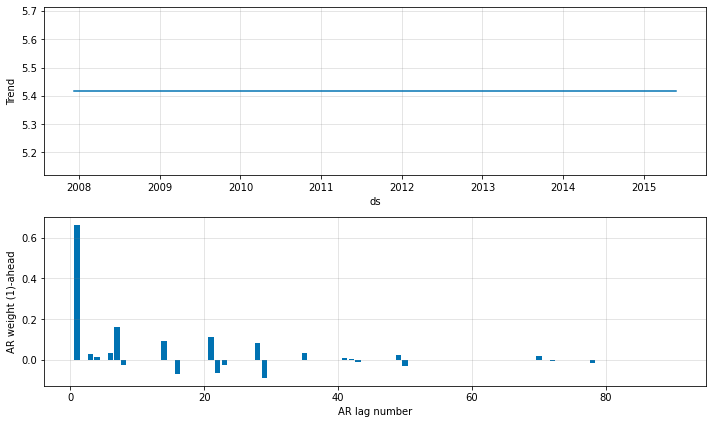

In [12]:
fig_param = m.plot_parameters()

### **<span  style ='color: brown'> 1-step ahead forecast with AR-Net: Using a Neural Network</span>**<a id ='AR-Net'></a>

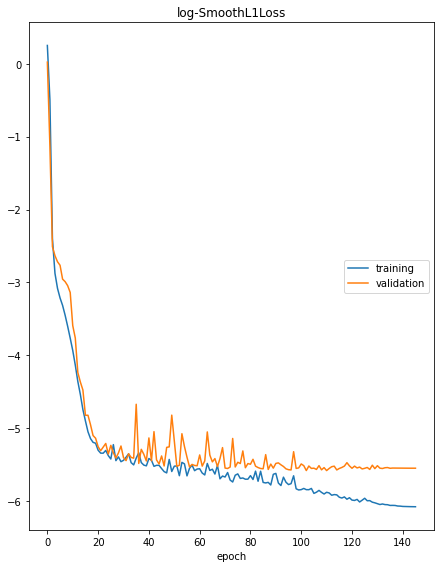

log-SmoothL1Loss
	training         	 (min:   -6.078, max:    0.251, cur:   -6.078)
	validation       	 (min:   -5.582, max:    0.022, cur:   -5.549)


In [13]:
m = NeuralProphet(
    growth='off',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*30,
    num_hidden_layers=4,
    d_hidden=32,
    learning_rate=0.003,
)
df_train, df_test = m.split_df(df, freq='D', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='D', validation_df=df_test, progress='plot')

In [14]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
145,0.002293,0.211779,0.298022,0.0,0.003891,0.252362,0.401844


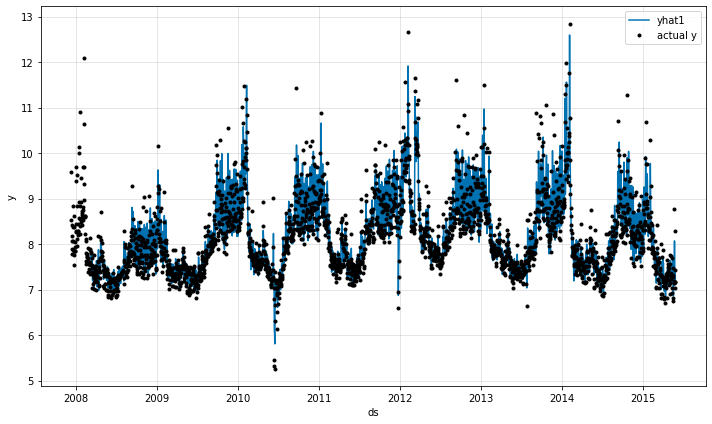

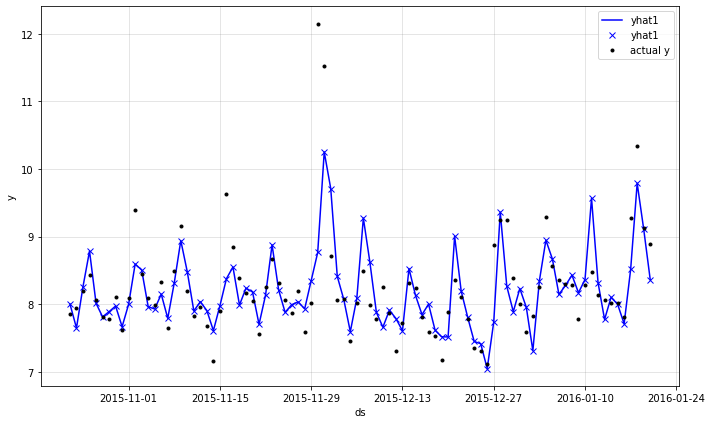

In [15]:
forecast = m.predict(df_train)
fig = m.plot(forecast)
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-3*30:])

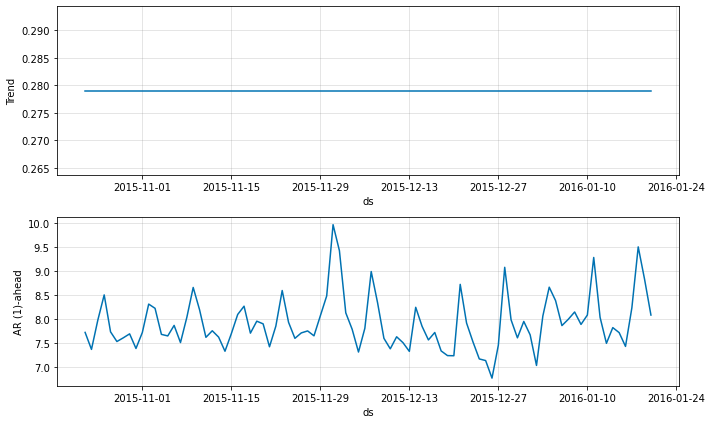

In [16]:
fig_comp = m.plot_components(forecast[-3*30:])